# Handwritten Digit Classification
Mostafa Ebrahimi


<a id='Introduction'></a>
## <span style="color:orange">Introduction</span>
In this project, we will use the famous MNIST dataset to build a handwritten digit classifier. The dataset consists of 70,000 images, each 28 x 28 pixels grayscale image of handwritten digits (0-9). The goal is to build a model that can correctly identify the digit (0-9) written in an image.


<a id='Importing-Libraries'></a>
## <span style="color:orange">Importing Libraries & declaring constants</span>

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import colorama

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

NUM_CLASSES = 10
PIXEL_DEPTH = 255


def print_header(text):
    print(colorama.Style.BRIGHT + colorama.Fore.GREEN + text + colorama.Style.RESET_ALL)

## <span style="color:orange">Show Images</span>
as you see, the images are 28 x 28 pixels grayscale images of handwritten digits (0-9).

In [28]:
print_header("Shape of Dataset")
print(x_train.shape[1:], "\n")


print_header("Show content of a image")
print("Label: ", y_train[0]) 
print("Image: ")
print(x_train[0])


Shape of Dataset
(28, 28) 

Show content of a image
Label:  5
Image: 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0

Show images of each class


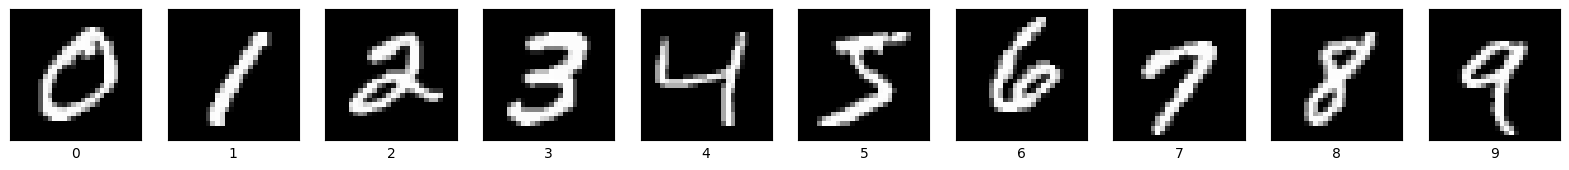

In [29]:
print_header("Show images of each class")
plt.figure(figsize=(20, 20))
for i in range(NUM_CLASSES):
    plt.subplot(1, NUM_CLASSES, i + 1)
    index_class = np.where(y_train == i)[0][0]
    img = x_train[index_class]
    plt.imshow(img, cmap='gray')
    plt.xlabel(str(i))
    plt.xticks([])
    plt.yticks([])

plt.show()

## <span style="color:orange">Number of images of each class</span>

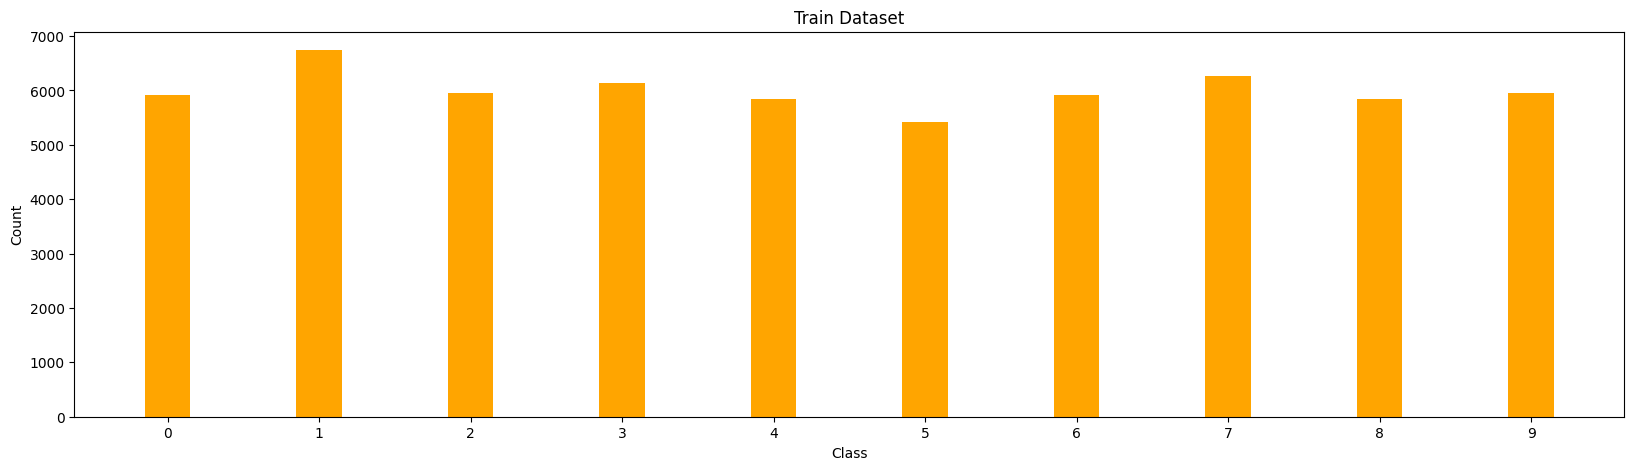

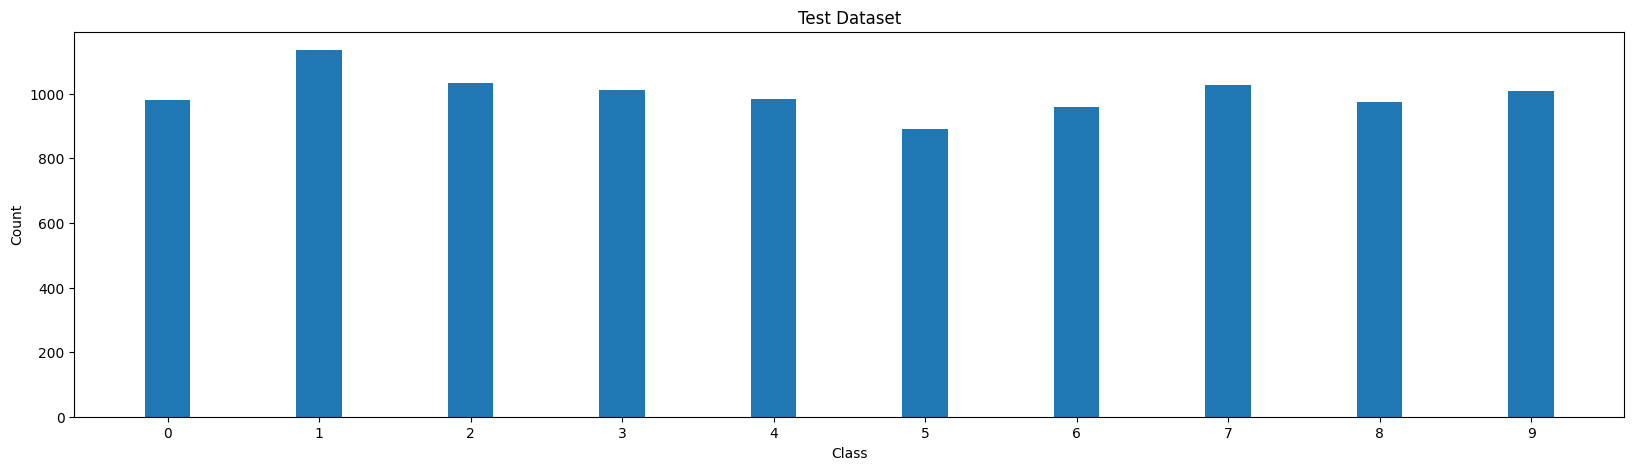

In [30]:
test_count_class = [np.sum(y_train == i) for i in range(NUM_CLASSES)]
plt.figure(figsize=(20, 5))
plt.title('Train Dataset')
plt.bar(range(NUM_CLASSES), test_count_class, width=0.3, color='orange')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(NUM_CLASSES))
plt.show()

test_count_class = [np.sum(y_test == i) for i in range(NUM_CLASSES)]
plt.figure(figsize=(20, 5))
plt.title('Test Dataset')
plt.bar(range(NUM_CLASSES), test_count_class, width=0.3)
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(range(NUM_CLASSES))
plt.show()

## <span style="color:orange">Normalization</span>

In [31]:
x_train = x_train / PIXEL_DEPTH
x_test = x_test / PIXEL_DEPTH

print_header("Show content of a image after normalization")
print("Label: ", y_train[0])
print("Image: ")
print(x_train[0])

Show content of a image after normalization
Label:  5
Image: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.  

## <span style="color:orange">Convert labels to one-hot vectors</span>

In [32]:
y_train = tf.keras.utils.to_categorical(y_train, NUM_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NUM_CLASSES)

print_header("Show a label after one-hot encoding")
print(y_train[0])

Show a label after one-hot encoding
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## <span style="color:orange">Generate the model</span>

In [ ]:
# Input layer : 28 x 28 = 784 n
# 2 hidden layer : 16 n, 16 n
# Output layer : 10 n

def get_model():
    # Define model
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(10, activation='softmax')
    ])

    # Compile model
    model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    


    return model